   # IMDB MOVIE REVIEWS PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)

In [2]:
imdb = pd.read_csv('IMDB_movie_reviews_details.csv')

In [3]:
imdb.head()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M


In [4]:
imdb.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
imdb.isnull().sum()

name           0
year           0
runtime        0
genre          0
rating         0
metascore    159
timeline       0
votes          0
gross        171
dtype: int64

In [6]:
imdb.dropna(inplace = True)

# Question 1: Find the exact number of genre with the highest ratings  

In [7]:
imdb.nlargest(1,['rating'])

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M


# Question 2: Plot a graph showing from lowest to highest movies in ascending order with their ratings

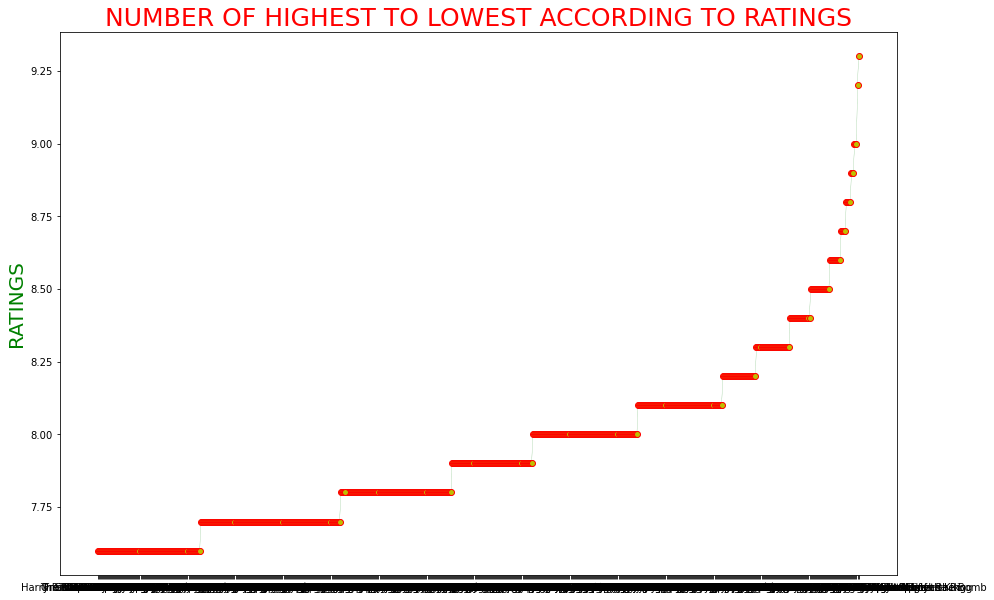

In [8]:
fig = plt.figure(figsize = (15,10))
df_aor= imdb.sort_values(by = 'rating')
plt.plot(df_aor.name,df_aor.rating ,'g', ls = '--', lw = 0.2, marker = 'o', markerfacecolor = 'y', markeredgecolor = 'r')
plt.ylabel('RATINGS', color = 'g', fontsize = 20)
plt.title('NUMBER OF HIGHEST TO LOWEST ACCORDING TO RATINGS', color = 'r', fontsize = 25)
plt.show()

# Question 3: Find the total number of movies released from 2008 to 2019

In [9]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       747 non-null    object 
 1   year       747 non-null    object 
 2   runtime    747 non-null    int64  
 3   genre      747 non-null    object 
 4   rating     747 non-null    float64
 5   metascore  747 non-null    float64
 6   timeline   747 non-null    object 
 7   votes      747 non-null    object 
 8   gross      747 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 58.4+ KB


In [10]:
imdb['year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', 'I 2017', '2012', '2009', '1981', '1979',
       '1964', '2004', '1992', '1987', '1986', '1984', '1983', '1976',
       '1973', '1971', '1962', '1959', '1958', '1952', '1944', '1941',
       '1927', '2013', '2007', '2005', '1989', '1965', '1963', '1950',
       '1948', '2017', 'I 2014', 'I 2015', 'I 2013', '2015', '1996',
       '1982', '1978', '1967', '1955', '1951', '1949', '1946', '1940',
       '1939', '1934', '1930', 'I 2004', '1970', '1969', '1961', '1925',
       'II 2016', 'I 2011', 'I 2001', '1947', '1938', '1933', 'I 2010',
       'I 2008', 'I 2007', '1935', 'I 1985', 'III 2018', 'I 2016',
       'II 2015', 'I 1995', '1953'], dtype=object)

In [11]:
imdb.replace({ 'I 2020' : '2020',  'III 2016' : '2016',
       'I 2014' : '2014', 'I 2015' : '2015', 'I 2013' : '2013',
       'I 2004' : '2004', '1970' : '1970',
       'II 2016' : '2016', 'I 2011' : '2011', 'I 2001' : '2001', 'I 2010' : '2010', 'I 2008' : '2008', 'I 2007' : '2007', 
        'I 1985' : '1985', 'III 2018' : '2018',
       'II 2015' : '2015', 'I 2016' : '2016', 'I 1995' : '1995'}, inplace = True)

In [12]:
imdb.replace({'I 2017' : '2017'}, inplace = True)

In [13]:
#imdb['year'].unique()

In [14]:
imdb['year']= pd.to_datetime(imdb['year'])

In [15]:
total = imdb[(imdb['year'] >= '2008') & (imdb['year'] <= '2019')]

In [16]:
total

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
3,The Dark Knight,2008-01-01,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
9,Inception,2010-01-01,148,"Action, Adventure, Sci-Fi",8.8,74.0,A thief who steals corporate secrets through t...,"2,113,984",$292.58M
19,Parasite,2019-01-01,132,"Comedy, Drama, Thriller",8.6,96.0,Greed and class discrimination threaten the ne...,"608,406",$53.37M
20,Interstellar,2014-01-01,169,"Adventure, Drama, Sci-Fi",8.6,74.0,A team of explorers travel through a wormhole ...,"1,558,558",$188.02M
34,Whiplash,2014-01-01,106,"Drama, Music",8.5,88.0,A promising young drummer enrolls at a cut-thr...,"738,672",$13.09M
...,...,...,...,...,...,...,...,...,...
924,The Blind Side,2009-01-01,129,"Biography, Drama, Sport",7.6,53.0,"The story of Michael Oher, a homeless and trau...","299,347",$255.96M
926,Seven Pounds,2008-01-01,123,Drama,7.6,36.0,A man with a fateful secret embarks on an extr...,"289,822",$69.95M
929,The Secret of Kells,2009-01-01,75,"Animation, Adventure, Family",7.6,81.0,A young boy in a remote medieval outpost under...,"32,865",$0.69M
936,Harry Potter and the Half-Blood Prince,2009-01-01,153,"Action, Adventure, Family",7.6,78.0,As Harry Potter begins his sixth year at Hogwa...,"486,611",$301.96M


In [17]:
total_num = len(imdb[(imdb['year'] >= '2008') & (imdb['year'] <= '2019')])

In [18]:
print(f' The total number of movies released from 2008 to 2019 is {total_num}')

 The total number of movies released from 2008 to 2019 is 227


# Question 4: Create a chart showing the metascore per category

In [19]:
imdb['rating'].unique()

array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ,
       7.9, 7.8, 7.7, 7.6])

In [38]:
meta = imdb.metascore.value_counts()
plt.figure(figsize = (30,20))
fig = px.bar(meta, y = meta, x = meta.index, text = meta.values, color = meta.index, labels = {'y': 'INDEX', 'index': 'METASCORE'},
             title = "NUMBER OF METASCORE BY CATEGORY", color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

<Figure size 2160x1440 with 0 Axes>

# Question 5: Show the percentage of movies that got a 9+ rating

In [21]:
nine = len(imdb[imdb['rating'] >= 9.0])

In [22]:
nine

5

In [23]:
rating = round(100*nine/len(imdb['rating']),2)

In [42]:
print(f' The total percentage of movies that got a nine plus rating is {rating}')

 The total percentage of movies that got a nine plus rating is 0.67


# Question 6: Get the percentage of movies released for each of this year(2010 to 2020)

In [25]:
percentage_10_20 = imdb[(imdb['year'] >= '2010') & (imdb['year'] <= '2020')]

In [26]:
percentage_10_20

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
9,Inception,2010-01-01,148,"Action, Adventure, Sci-Fi",8.8,74.0,A thief who steals corporate secrets through t...,"2,113,984",$292.58M
19,Parasite,2019-01-01,132,"Comedy, Drama, Thriller",8.6,96.0,Greed and class discrimination threaten the ne...,"608,406",$53.37M
20,Interstellar,2014-01-01,169,"Adventure, Drama, Sci-Fi",8.6,74.0,A team of explorers travel through a wormhole ...,"1,558,558",$188.02M
34,Whiplash,2014-01-01,106,"Drama, Music",8.5,88.0,A promising young drummer enrolls at a cut-thr...,"738,672",$13.09M
35,The Intouchables,2011-01-01,112,"Biography, Comedy, Drama",8.5,57.0,After he becomes a quadriplegic from a paragli...,"778,379",$13.18M
...,...,...,...,...,...,...,...,...,...
915,Despicable Me,2010-01-01,95,"Animation, Comedy, Crime",7.6,72.0,When a criminal mastermind uses a trio of orph...,"507,818",$251.51M
916,50/50,2011-01-01,100,"Comedy, Drama, Romance",7.6,72.0,"Inspired by a true story, a comedy centered on...","318,164",$35.01M
917,Kick-Ass,2010-01-01,117,"Action, Comedy, Crime",7.6,66.0,Dave Lizewski is an unnoticed high school stud...,"530,801",$48.07M
919,Moneyball,2011-01-01,133,"Biography, Drama, Sport",7.6,87.0,Oakland A's general manager Billy Beane's succ...,"379,573",$75.61M


In [27]:
total_percentage_10_20 = round(100*percentage_10_20['year'].value_counts()/len(imdb['year']),2)

In [28]:
total_percentage_10_20

2014-01-01    3.75
2013-01-01    3.21
2010-01-01    2.68
2016-01-01    2.68
2017-01-01    2.54
2015-01-01    2.41
2011-01-01    2.14
2012-01-01    2.01
2019-01-01    2.01
2018-01-01    1.61
Name: year, dtype: float64

# Question 7: Outline the 5 top genre that got the highest rating 

In [29]:
genre_rating = imdb.drop(['runtime','metascore','timeline','votes','gross'], axis = 1)

In [30]:
genre_rating

,name,year,genre,rating
0,The Shawshank Redemption,1994-01-01,Drama,9.3
1,The Godfather,1972-01-01,"Crime, Drama",9.2
3,The Dark Knight,2008-01-01,"Action, Crime, Drama",9.0
4,The Godfather: Part II,1974-01-01,"Crime, Drama",9.0
5,12 Angry Men,1957-01-01,"Crime, Drama",9.0
...,...,...,...,...
991,Kelly's Heroes,1970-01-01,"Adventure, Comedy, War",7.6
993,The Jungle Book,1967-01-01,"Animation, Adventure, Family",7.6
994,A Hard Day's Night,1964-01-01,"Comedy, Musical",7.6
997,Shane,1953-01-01,"Drama, Western",7.6


In [31]:
genre_rating.nlargest(5, ['rating'])

,name,year,genre,rating
0,The Shawshank Redemption,1994-01-01,Drama,9.3
1,The Godfather,1972-01-01,"Crime, Drama",9.2
3,The Dark Knight,2008-01-01,"Action, Crime, Drama",9.0
4,The Godfather: Part II,1974-01-01,"Crime, Drama",9.0
5,12 Angry Men,1957-01-01,"Crime, Drama",9.0


# Question 8: Plot a graph to show the name of movies name with same runtime

In [39]:
pd.set_option('display.max_rows', None)
imdb['runtime'].value_counts()
# px.histogram for melbourne,  px.bar for this one

130    19
100    18
102    18
101    17
129    17
122    17
120    17
108    16
113    16
127    15
118    15
107    14
105    13
119    12
117    12
132    12
112    12
115    12
103    12
134    11
110    11
109    11
121    11
104    11
126    11
95     10
138    10
99     10
116    10
106    10
123     9
98      9
136     9
137     9
128     8
124     8
133     8
114     8
141     8
144     8
135     8
93      8
94      8
96      8
140     7
90      7
92      7
170     6
88      6
178     6
125     6
153     6
131     6
97      6
139     6
147     6
143     6
152     6
157     5
146     5
111     5
87      5
154     5
165     4
80      4
155     4
169     4
142     4
149     4
86      4
145     4
161     4
89      4
162     4
188     3
181     3
85      3
180     3
150     3
91      3
172     3
156     3
158     2
81      2
75      2
202     2
197     2
82      2
151     2
83      2
84      2
148     2
189     2
164     2
78      1
76      1
72      1
238     1
228     1
192     1


In [41]:
runtime = imdb['runtime'].value_counts()
fig = px.bar(runtime, y = runtime, x = runtime.index, text = runtime.values, color = runtime.index, 
             labels = {'y': 'NUMBER OF MOVIES', 'index': 'RUNTIME'}, title = 'MOVIES WITH THE SAME RUNTIME', 
             color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()
